In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import librosa
import pickle
from IPython.display import Audio

## Preprocessing

In [2]:

DATASET_PATH = r"C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3\data_extraction\data_previews"

train_data = []
for path in glob.iglob(os.path.join(DATASET_PATH, "*.mp3")):
    video_id = path.split("\\")[-1]
    video_id = video_id.split("_")[-1]
    video_id = video_id.split(".")[0]
    train_data.append({"track_id":video_id, "path": path})
    
    
train_data = pd.DataFrame(train_data)
train_data.head(10)

,track_id,path
0,7pse475uICmWRY5hEkvPvI,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
1,6AoYWCzsDls6c61Zp5qTuU,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
2,6QZtmgaUkxWk3Rlq3Upll6,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
3,1jBmW1fRXgLhy1XwE0SJTN,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
4,4GYWNXDrG5wWOJteicSy7b,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
5,4COGASZEbAxmH6k5gYMo6G,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
6,0r0UDwngm74U5ccMQ9gMBM,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
7,3Ot04s80MZBhiYP2wHo0is,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
8,3EYTVekyY04eqdoi2iGlgJ,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
9,4NQQ5fK6qOEMsJNlhjUkIg,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...


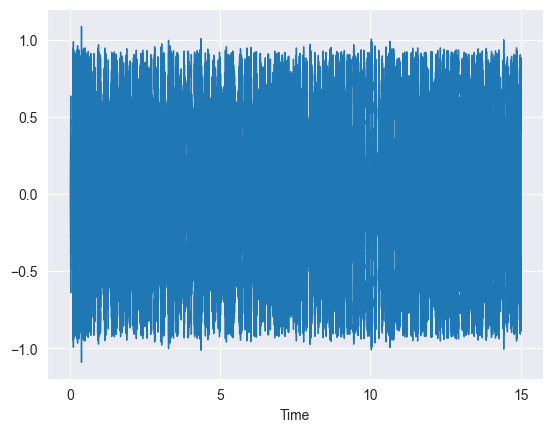

In [10]:
audio_test_path = train_data["path"][7]
y, sr = librosa.load(audio_test_path, duration=15)
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)
mffc_test = librosa.feature.mfcc(y=y, sr=sr)

In [11]:
print(mffc_test.shape)


(20, 646)


## Processing

In [12]:
# FIXME: Try with other ways to get the features
def getFeatures_measures(paths):
    features = []
    track_ids = []
    counter_audio = 0
    # get a vector of vector per audio file
    for path in paths:
        try:
            y, sr = librosa.load(path, duration=15)
            # get features
            # FIXME: Probar luego con vector de varias metricas como mean, std, etc
            # Por ahora se esta probando solo con mfcc
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            features.append(mfccs)
            # get track id
            track_id = path.split("\\")[-1].split("_")[-1].split(".")[0]
            track_ids.append(track_id)
            if(counter_audio % 100 == 0):
                print(f"File: {counter_audio}")
        except:
            print(f"Error in file {counter_audio}") 
        counter_audio += 1
        
    return track_ids, features

In [13]:
train_data_paths = np.array(train_data["path"])
track_ids, features = getFeatures_measures(train_data_paths)

File: 0
File: 100
File: 200
File: 300
File: 400
File: 500
File: 600
File: 700
File: 800
File: 900
File: 1000
File: 1100
File: 1200
File: 1300
File: 1400
File: 1500
File: 1600
File: 1700
File: 1800
File: 1900
File: 2000
File: 2100
File: 2200
File: 2300
File: 2400
File: 2500
File: 2600
File: 2700
File: 2800
File: 2900
File: 3000
File: 3100
File: 3200
File: 3300
File: 3400
File: 3500
File: 3600
File: 3700
File: 3800
File: 3900
File: 4000
File: 4100
File: 4200
File: 4300
File: 4400
File: 4500
File: 4600
File: 4700
File: 4800
File: 4900
File: 5000
File: 5100
File: 5200
File: 5300
File: 5400
File: 5500
File: 5600
File: 5700
File: 5800
File: 5900
File: 6000
File: 6100
File: 6200
File: 6300
File: 6400
File: 6500
File: 6600
File: 6700
File: 6800
File: 6900
File: 7000
File: 7100
File: 7200
File: 7300
File: 7400
File: 7500
File: 7600
File: 7700
File: 7800
File: 7900
File: 8000
File: 8100
File: 8200
File: 8300
File: 8400
File: 8500
File: 8600
File: 8700
File: 8800
File: 8900
File: 9000
File: 9100


In [14]:
# test
print(track_ids[0:5])
print(features[0:2])

print(len(track_ids))
print(len(features))
print(len(features[0]))
print(len(features[0][0]))

print(features[0].shape)

['7pse475uICmWRY5hEkvPvI', '6AoYWCzsDls6c61Zp5qTuU', '6QZtmgaUkxWk3Rlq3Upll6', '1jBmW1fRXgLhy1XwE0SJTN', '4GYWNXDrG5wWOJteicSy7b']
[array([[-124.45837   ,  -53.531982  ,  -48.21779   , ...,  -30.638329  ,
         -31.604334  ,  -45.731205  ],
       [ 131.25378   ,  131.55539   ,  125.097565  , ...,   97.897156  ,
          99.54365   ,   99.12096   ],
       [ -49.942764  ,  -45.864105  ,  -48.13395   , ...,  -18.328644  ,
         -20.286613  ,  -10.049694  ],
       ...,
       [   0.6375346 ,    6.7834897 ,    5.211746  , ...,   17.06216   ,
          10.6366205 ,   -5.449005  ],
       [  -6.775588  ,   -6.4606085 ,   -6.9017544 , ...,    8.563374  ,
           0.14207727,   -3.4256854 ],
       [  -2.3949804 ,    0.21212149,    4.150017  , ...,   17.794884  ,
          20.2626    ,   11.229211  ]], dtype=float32), array([[-113.10314   ,  -48.930035  ,  -41.515217  , ..., -111.12258   ,
         -70.66685   ,  -46.516426  ],
       [  99.608505  ,   99.15825   ,  105.285095  , ..

In [15]:
# test if the dimensions are the same for every file

for counter, feature in enumerate(features):
    if feature.shape != (20, 646):
        features.pop(counter)
        track_ids.pop(counter)
        print(f"Error in file {counter}")
print(len(features))


Error in file 2638
Error in file 3304
12059


In [16]:
# Verify if all the features have the same dimensions
for feature in features:
    if feature.shape != (20, 646):
        print("Error")

In [17]:
# save the data in .pkl
with open("feature_spotify_15seg.pkl", "wb") as file: 
    pickle.dump(track_ids, file)
    pickle.dump(features, file)
    

In [19]:
# load the data
with open("feature_spotify_15seg.pkl", "rb") as file:
    track_ids = pickle.load(file)
    features = pickle.load(file)

In [20]:
# test
print(track_ids[0:5])
print(features[0:2])

print(len(track_ids))
print(len(features))

['7pse475uICmWRY5hEkvPvI', '6AoYWCzsDls6c61Zp5qTuU', '6QZtmgaUkxWk3Rlq3Upll6', '1jBmW1fRXgLhy1XwE0SJTN', '4GYWNXDrG5wWOJteicSy7b']
[array([[-124.45837   ,  -53.531982  ,  -48.21779   , ...,  -30.638329  ,
         -31.604334  ,  -45.731205  ],
       [ 131.25378   ,  131.55539   ,  125.097565  , ...,   97.897156  ,
          99.54365   ,   99.12096   ],
       [ -49.942764  ,  -45.864105  ,  -48.13395   , ...,  -18.328644  ,
         -20.286613  ,  -10.049694  ],
       ...,
       [   0.6375346 ,    6.7834897 ,    5.211746  , ...,   17.06216   ,
          10.6366205 ,   -5.449005  ],
       [  -6.775588  ,   -6.4606085 ,   -6.9017544 , ...,    8.563374  ,
           0.14207727,   -3.4256854 ],
       [  -2.3949804 ,    0.21212149,    4.150017  , ...,   17.794884  ,
          20.2626    ,   11.229211  ]], dtype=float32), array([[-113.10314   ,  -48.930035  ,  -41.515217  , ..., -111.12258   ,
         -70.66685   ,  -46.516426  ],
       [  99.608505  ,   99.15825   ,  105.285095  , ..